<img src="https://i.imgur.com/12tfKrD.png" alt="Alin">
</img>


# Demo RNN -- 張愛玲散文集AI二次創作

資料集: 張愛玲繁體中文小說 《傳奇》

爬蟲來源: [crawl_book](https://colab.research.google.com/drive/1f_HvQEvgkJPFc473TlA-I_3EmkThA2SR?usp=sharing)

程式碼參考: [Tensorflow](https://www.tensorflow.org/tutorials/text/text_generation)

本次資料集，著作權乃是張愛玲女士所擁有。**請勿將本次資料集散播、更改、用於非商業用途**。

> **資料集說明**

今年是張愛玲女士101年誕辰。張愛玲出生名門，曾就讀於香港大學和聖約翰大學，受過良好的中西教育。上海淪陷時期，陸續發表《沉香屑·第一爐香》、《傾城之戀》、《心經》、《金鎖記》等中、短篇小說，震動上海文壇。

這次訓練取張愛玲散文集《傳奇》作為訓練，《傳奇》收留五篇散文: 「留情」、「鴻鸞禧」、「紅玫瑰與白玫瑰」、「等」、「桂花蒸阿小悲秋」。其中以「紅玫瑰與白玫瑰」最為膾炙人口。

> **訓練步驟**

深度學習在訓練模型上有以下幾個重要的步驟:
1. 讀入相關封包
2. 取得資料集 
3. 資料前處理
4. 建立模型
5. 制定訓練計畫
6. 評估模型
7. 做預測

> **本次模型介紹 RNN**

![](https://i.imgur.com/FaY50C8.png)


我們來看看維度，很多人會搞不懂RNN的維度:

一個Seq通過RNN後的維度

* Input: (Seq,${originDim}$)
* RNN Neuron: 2048
* Output: (Seq,2048) if (return_sequence == True) else (1,2048)
![](https://i.imgur.com/9SVl6JR.png)

![](https://i.imgur.com/z4ElFIr.png)

> **把生成問題變成分類問題**

![](https://i.imgur.com/TBHKuf6.png)


In [ ]:
# ****************************************
# **請勿將本次資料集散播、用於非學術用途**
# ****************************************

# 執行即代表同意將會合法、合理使用資料集
# 太多人同時存取可能會報cannot retrieve file error
# 點擊you may still be able to access 下面那個連結再自行上傳檔案即可

# !gdown --id 1gMpt0CdlPjr1cR3HwDqumeKaucrSYhhe --output "./Eileen_Legendary.txt"

# !wget -O Eileen_Legendary.txt "http://140.115.82.54/NN/Recurrent/Eileen_Legendary.txt"

!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1uNgsjCp11BjIHYBwyL48gc2XL-boO5Kz' -O Shakespeare_Twelfth_Nigh.txt

--2022-05-12 23:58:37--  https://drive.google.com/uc?export=download&id=1uNgsjCp11BjIHYBwyL48gc2XL-boO5Kz
Resolving drive.google.com (drive.google.com)... 172.253.115.138, 172.253.115.100, 172.253.115.113, ...
Connecting to drive.google.com (drive.google.com)|172.253.115.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-38-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/72bq857hd6g69u10od9voc57g21fv9ut/1652399850000/14055454935798647983/*/1uNgsjCp11BjIHYBwyL48gc2XL-boO5Kz?e=download [following]
--2022-05-12 23:58:38--  https://doc-14-38-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/72bq857hd6g69u10od9voc57g21fv9ut/1652399850000/14055454935798647983/*/1uNgsjCp11BjIHYBwyL48gc2XL-boO5Kz?e=download
Resolving doc-14-38-docs.googleusercontent.com (doc-14-38-docs.googleusercontent.com)... 142.250.65.65, 2607:f8b0:4004:832::2001
Connecting to doc-14-38-docs.googleusercontent.com (doc-14-38

## 1. 讀入Package

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import os
import matplotlib.pyplot as plt

## 2. 取得資料集

In [ ]:
# 作業之一就是試試看其他本小說

book = ""
with open("./Shakespeare_Twelfth_Nigh.txt","r",encoding="utf8") as file:
  for line in file:
    book += line

book_length = len(book)
unique_words = set(book)
print(f"莎士比亞《第十二夜》共有 {book_length} 字詞")
print(f"包含了 {len(unique_words)} 個獨一無二的字 (含標點符號)\n")
print(book[0:500])

莎士比亞《第十二夜》共有 42369 字詞
包含了 2003 個獨一無二的字 (含標點符號)


《二○一五年四月三日版》
《好讀書櫃》經典版
劇中人物
奧西諾 伊利里亞公爵
西巴斯辛 薇奧拉之兄
安東尼奧 船長，西巴斯辛之友
另一船長 薇奧拉之友
凡倫丁，丘里奧 公爵侍臣
托比．培爾契爵士 奧麗維亞的叔父
安德魯．艾古契克爵士
馬伏里奧 奧麗維亞的管家
費邊
費斯特 小丑，奧麗維亞之僕
奧麗維亞 富有的伯爵小姐
薇奧拉 熱戀公爵者
瑪利亞 奧麗維亞的侍女
群臣、牧師、水手、警吏、樂工及其他侍從等
地點 伊利里亞某城及其附近海濱


第一場 公爵府中一室
──公爵、丘里奧、眾臣同上；樂工隨侍。
公爵 假如音樂是愛情的食糧，那麼奏下去吧；盡量地奏下去，好讓愛情因過飽噎塞而死。又奏起這個調子來了！它有一種漸漸消沉下去的節奏。啊！它經過我的耳畔，就像微風吹拂一叢紫羅蘭，發出輕柔的聲音，一面把花香偷走，一面又把花香分送。夠了！別再奏下去了！它現在已經不像原來那樣甜蜜了。愛情的精靈呀！你是多麼敏感而活潑；雖然你有海一樣的容量，可是無論怎樣高貴超越的事物，一進了你的範圍，便會在頃刻間失去了它的價值。愛情是這樣充滿了意象，在一切事物中是最富於幻想的。
丘里奧 殿下，您要不要去打獵？
公爵 什麼


## 3. 資料前處理

文字前處理有一堆方法、作法:
* 切字
* 還原
* 清除特殊字符
* 清除不常見字符 (StopWord)


我這裡僅使用去除不常見的字(StopWord)

In [ ]:
# 計算字數統計
words_count = {}
for w in book:
  if w in words_count:
    words_count[w] += 1
  else:
    words_count[w] = 1

words_count = sorted(words_count.items(),key=lambda x:x[1])

In [ ]:
stop_word = 8
unique_words = [w_tup[0] for w_tup in words_count if w_tup[1]>stop_word]
print(f"去除次數小於{stop_word}的文字剩餘 : {len(unique_words)}")

去除次數小於8的文字剩餘 : 571


In [ ]:
print(f"原本莎士比亞《第十二夜》共有 {book_length} 字詞")
print(f"去除不常出現的文字後")
book = [w for w in book if w in unique_words]
print(f"剩餘{len(book)}個字")

原本莎士比亞《第十二夜》共有 42369 字詞
去除不常出現的文字後
剩餘38475個字


In [ ]:
# 文字轉數字(index)
word_2_index = {word:index for index,word in enumerate(unique_words)}
index_2_word = {word_2_index[word]:word for word in word_2_index}

book_2_index = [word_2_index[w] for w in book]

print("原始文字 : ")
print(book[:40])
print("-"*40)
print("轉成index : ")
print({word_2_index[w] for w in book[:40]})

原始文字 : 
['\n', '《', '二', '一', '年', '四', '三', '》', '\n', '《', '好', '讀', '書', '》', '經', '\n', '中', '人', '物', '\n', '奧', '西', '諾', ' ', '伊', '利', '里', '亞', '公', '爵', '\n', '西', '巴', '斯', '辛', ' ', '薇', '奧', '拉', '之']
----------------------------------------
轉成index : 
{0, 1, 2, 515, 517, 518, 137, 138, 402, 530, 542, 546, 426, 555, 560, 433, 562, 565, 566, 437, 195, 196, 451, 85, 469, 344, 484, 488, 495, 496, 242}


In [ ]:
def ind2word_seq(seq):
  return [index_2_word[i] for i in seq]

In [ ]:
# 設定輸入模型長度
seq_len = 20
characters = tf.data.Dataset.from_tensor_slices(book_2_index)
# characters = characters.map(lambda w:word_2_index[w.item()])

sequences = characters.batch(seq_len+1,drop_remainder=True)

for seq in sequences.take(2):
  print(seq.shape)
  print(seq)
  print([index_2_word[i] for i in seq.numpy()])

(21,)
tf.Tensor(
[566   0 137 562 402 138 344   1 566   0 542 242   2   1 484 566 433 555
  85 566 560], shape=(21,), dtype=int32)
['\n', '《', '二', '一', '年', '四', '三', '》', '\n', '《', '好', '讀', '書', '》', '經', '\n', '中', '人', '物', '\n', '奧']
(21,)
tf.Tensor(
[496 195 565 196 495 530 546 488 515 566 496 451 469 426 565 517 560 518
 437 197 566], shape=(21,), dtype=int32)
['西', '諾', ' ', '伊', '利', '里', '亞', '公', '爵', '\n', '西', '巴', '斯', '辛', ' ', '薇', '奧', '拉', '之', '兄', '\n']


![](https://i.imgur.com/YMVMFEJ.png)


In [ ]:
# 做input、target切割
def split_input_target(seq):
  input_txt = seq[:-1]
  target_txt = seq[1:]
  return input_txt,target_txt

split_input_target(list("Tensorflow"))

(['T', 'e', 'n', 's', 'o', 'r', 'f', 'l', 'o'],
 ['e', 'n', 's', 'o', 'r', 'f', 'l', 'o', 'w'])

![](https://i.imgur.com/YoHWLkf.png)


In [ ]:
dataset = sequences.map(split_input_target)

for input_example,target_exaple in dataset.take(1):
  print("Input :", ind2word_seq(input_example.numpy()))
  print("Target:", ind2word_seq(target_exaple.numpy()))
  print("-"*50)
  print("Input :", input_example.numpy())
  print("Target:", target_exaple.numpy())

Input : ['\n', '《', '二', '一', '年', '四', '三', '》', '\n', '《', '好', '讀', '書', '》', '經', '\n', '中', '人', '物', '\n']
Target: ['《', '二', '一', '年', '四', '三', '》', '\n', '《', '好', '讀', '書', '》', '經', '\n', '中', '人', '物', '\n', '奧']
--------------------------------------------------
Input : [566   0 137 562 402 138 344   1 566   0 542 242   2   1 484 566 433 555
  85 566]
Target: [  0 137 562 402 138 344   1 566   0 542 242   2   1 484 566 433 555  85
 566 560]


In [ ]:
# 建立資料集
# Batch size
BATCH_SIZE = 64

BUFFER_SIZE = 10000

dataset = (
    dataset
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE, drop_remainder=True))

dataset

<BatchDataset element_spec=(TensorSpec(shape=(64, 20), dtype=tf.int32, name=None), TensorSpec(shape=(64, 20), dtype=tf.int32, name=None))>

## 4. 建立模型

![](https://i.imgur.com/TBHKuf6.png)

In [ ]:
# 超參數
EMBEDDING_DIM = 512

# 使用 keras 建立一個非常簡單的 LSTM 模型
model = tf.keras.Sequential()

model.add(
  tf.keras.layers.Embedding(
    input_dim=len(unique_words), 
    output_dim=EMBEDDING_DIM
))

model.add(
  tf.keras.layers.LSTM(
    units=4096, 
    return_sequences=True, 
))

model.add(
  tf.keras.layers.LSTM(
    units=2048, 
    return_sequences=True,
))
  
model.add(
  tf.keras.layers.Dense(
      len(unique_words),activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 512)         292352    
                                                                 
 lstm (LSTM)                 (None, None, 4096)        75513856  
                                                                 
 lstm_1 (LSTM)               (None, None, 2048)        50339840  
                                                                 
 dense (Dense)               (None, None, 571)         1169979   
                                                                 
Total params: 127,316,027
Trainable params: 127,316,027
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 查看模型的輸入、輸出 shape
for input_example,target_exaple in dataset.take(1):
  predict_example = model(input_example)
  print(f"Model input shape : {input_example.shape}")
  print(f"Model output shape : {predict_example.shape}")
  print(f"Model target shape : {target_exaple.shape}")

Model input shape : (64, 20)
Model output shape : (64, 20, 571)
Model target shape : (64, 20)


In [ ]:
print("原本的中文字序列：")
[print(index_2_word[ind],end="") for ind in input_example[0].numpy()]
print()
print("-"*40)
print("輸入尚未訓練的model後獲得：")
print()

predict_words = tf.math.argmax(predict_example[0],-1)
[print(index_2_word[ind],end="") for ind in predict_words.numpy()]
print()

原本的中文字序列：
你的父？
薇奧拉 我是薩人。西巴斯辛是我
----------------------------------------
輸入尚未訓練的model後獲得：

呢味味容容差教教教無行行也也也半伙艾艾死


## 5. 制定訓練計畫並訓練

* [sparse_categorical_crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/sparse_categorical_crossentropy) V.S. [categorical_crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/categorical_crossentropy)

```python=
# categorical_crossentropy
y_true = [[0, 1, 0], [0, 0, 1]]
y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]
assert loss.shape == (2,)

# sparse_categorical_crossentropy
y_true = [1, 2]
y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]
assert loss.shape == (2,)

```


In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam")

In [ ]:
EPOCHS = 50
history = model.fit(
    dataset, # 前面使用 tf.data 建構的資料集
    epochs=EPOCHS,
)

Epoch 1/50
28/28 [==============================] - 11s 297ms/step - loss: 5.8698
Epoch 2/50
28/28 [==============================] - 8s 299ms/step - loss: 5.3798
Epoch 3/50
28/28 [==============================] - 9s 304ms/step - loss: 5.0553
Epoch 4/50
28/28 [==============================] - 9s 305ms/step - loss: 4.7266
Epoch 5/50
28/28 [==============================] - 9s 312ms/step - loss: 4.4176
Epoch 6/50
28/28 [==============================] - 9s 312ms/step - loss: 4.1129
Epoch 7/50
28/28 [==============================] - 9s 313ms/step - loss: 3.8679
Epoch 8/50
28/28 [==============================] - 9s 316ms/step - loss: 3.6642
Epoch 9/50
28/28 [==============================] - 9s 320ms/step - loss: 3.4629
Epoch 10/50
28/28 [==============================] - 9s 323ms/step - loss: 3.2420
Epoch 11/50
28/28 [==============================] - 9s 325ms/step - loss: 2.9574
Epoch 12/50
28/28 [==============================] - 9s 329ms/step - loss: 2.5964
Epoch 13/50
28/28 [=====

## 6. 衡量模型

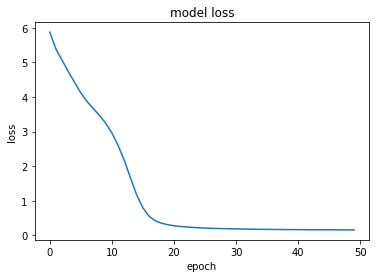

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

In [ ]:
after_train_predictions = model(input_example)
after_sampled_indices = tf.argmax(after_train_predictions[0],1)

print("原本的中文字序列：")
[print(index_2_word[ind],end="") for ind in input_example[0].numpy()]
print()
print("-"*40)
print("輸入進訓練後的model後獲得：")
print()

[print(index_2_word[ind],end="") for ind in after_sampled_indices.numpy()]
print()

原本的中文字序列：
你的父？
薇奧拉 我是薩人。西巴斯辛是我
----------------------------------------
輸入進訓練後的model後獲得：

的誓？
薇奧拉 我是薩人。西巴斯辛是我的


## 7. 做預測

![](https://i.imgur.com/YsOj6Mw.png)

在實際生成文字時，我們會想要增加一些隨機性。比如”天天出去” 不加入隨機 “天天天天” 如果我們全部輸出的字都是取softmax最大可能性，則一個訓練完美的model會把整本書給輸出出來。但是我們要的是，希望電腦在最大可能性的幾個字中隨機挑選一個字出來。

tf.random.categorical 會根據softmax機率後隨機挑選字，但是我們不希望因為模型很爛導致不合理的字被選中，因此我們會除上一個temperature來增加可能字的比重。

EX: "天天出去" 預測下一個字
1. 玩 : 0.3 
2. 天 : 0.1 
3. 浪 : 0.4 

"天"有的機率被印出，我們不希望。所以我們可以在每一個機率除上一個temperature(0.01)
1. 玩 : 30 
2. 天 : 10 
3. 浪 : 40 
原本"浪"跟"天"差0.3，除temperature後差30



In [ ]:
# 預測文字，並把預測文字循環當作下一次的輸入

# 設定你的temperature
temperature = 0.01

def generateWords(input,words=500):
  [print(index_2_word[ind],end="") for ind in input]
  for i in range(words):
    next_input = tf.expand_dims(input,axis=0)
    predicts = model(next_input)
    predicts = predicts[:,-1,:]
    predicts /= temperature
    result = tf.random.categorical(
        predicts,num_samples=1
    )
    chinese_ind = tf.squeeze(result).numpy()
    print(index_2_word[chinese_ind],end="")
    input = input+[chinese_ind]
    input = input[-seq_len:]

In [ ]:
init_seq = "第十二夜"
init_seq_ind = [word_2_index[w] for w in init_seq]
input = init_seq_ind[-seq_len:]

generateWords(input,800)

第十二夜等我；我希望您不會見他來。
托比 我們會把你間作的人，請他留吧。
薇奧拉 我要來，殿下，朋友；我是個。
托比 我的侄女見什麼鬼把她哥哥的死死。
小丑 你們不過起這樣的嗎？
薇奧拉 您僕人的名字是西薩里奧，美貌的人，
小丑 是的，
什麼您要是我的。
薇奧拉 不，我的名字不，我要為你的。
奧麗維亞 把你的尊意告訴你！
薇奧拉 我不是個要錢的信差，差生，我可以一直做的最的，我可以用的希望來您的；我可以跟他們兩人連無條的地。可是您，先生，卻是您的僕人，您是什麼意思？
奧麗維亞 我的意思，他的嗎？
薇奧拉 不，殿下，我要叫您說話。
費邊 他在這兒給他的婚了！
小丑 唉，我的心不是是的傻子。
馬伏里奧 你怎麼說，小姐？
馬伏里奧 我們都叫他去吧，我們要聽一個瘋；我是個瘋子也會傷歡你，為來的眼。
薇奧拉 唉！我好好，這樣正是我的靈魂。
馬伏里奧 我知道你在說些什麼，很得我的；不是我的僕人，得得這樣的話，然是您不過我的大人。
奧麗維亞 唉！
他要是你的話？
薇奧拉 我的來意，小姐，我是個瘋子。
托比 小姐，我來了他；他是個魔鬼，我是個瘋子。
馬伏里奧 （在）托巴斯師傅！
小丑 嘿，我可真是多才多呢；雖然我們兩四力的話，可是我卻不肯服，因此，要是我在這兒給到了，可是我的話怎麼清，我的事情怎樣？
薇奧拉 我的來意，小姐，我是個瘋子。
托比 小姐，我來不過是個傻子；我知道我的錢不夠，
小丑 不，你們把我的名兄。
小丑 您說，先生，我是個瘋子。
馬伏里奧 「我的命在，，，請你的著你的臉人的話。
薇奧拉 我可以還給你。
奧麗維亞 我不要叫他蛋出；他不是我的一樣，不要叫您是什麼意？
奧麗維亞 他是什麼話？
馬伏里奧 「有有的人是來的富貴，」……
奧麗維亞 你的黃襪子！
馬伏里奧 「我的命在，，，，我的前不過去，我的愛情是個世的的。
安德魯 我們得什麼絕妙的理由，可是我有不能跟我。
薇奧拉 我是一個使者

In [ ]:
# 不要執行這一個block
# import time
# while True:
#   time.sleep(5)
#   pass

## 作業2.1 (30%)

使用[爬蟲程式](https://colab.research.google.com/drive/1f_HvQEvgkJPFc473TlA-I_3EmkThA2SR?usp=sharing)來取得一個新的文本資料集，或是不管你從哪裡取得的資料集也可以(不要再張愛玲了，不限中英文)。然後丟入這個模型來看看AI生成文字的成果，將**結果**與**你的心得**(不是機器產生的心得)，貼上pdf。

請隨意修改本colab的模型與參數來達到更好的結果。

資料集越有趣越好，比如你可以去爬PTT文章來製作廢文產生器。去爬Dcard製作幻想文產生器。